In [120]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [121]:
df = pd.read_csv("Crop_recommendation.csv")
print(df.head())

    N   P   K  temperature   humidity        ph    rainfall label
0  90  42  43    20.879744  82.002744  6.502985  202.935536  rice
1  85  58  41    21.770462  80.319644  7.038096  226.655537  rice
2  60  55  44    23.004459  82.320763  7.840207  263.964248  rice
3  74  35  40    26.491096  80.158363  6.980401  242.864034  rice
4  78  42  42    20.130175  81.604873  7.628473  262.717340  rice


In [122]:
df.label.unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [123]:
print(df.columns)

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')


In [124]:
crop_dict={
    'rice': 1,
    'maize': 2,
    'jute': 3,
    'cotton': 4,
    'coconut': 5,
    'papaya': 6,
    'orange': 7,
    'apple': 8,
    'muskmelon': 9,
    'watermelon': 10,
    'grapes': 11,
    'mango': 12,
    'banana': 13,
    'pomegranate': 14,
    'lentil': 15,
    'blackgram': 16,
    'mungbean': 17,
    'mothbeans': 18,
    'pigeonpeas': 19,
    'kidneybeans': 20,
    'chickpea': 21,
    'coffee': 22
}

df['label'] = df['label'].map(crop_dict)

In [125]:
from sklearn.utils import shuffle

df = shuffle(df, random_state=42)

In [126]:
X = df[['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall']]
y = df['label']

In [127]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,shuffle=True, random_state=42)

RandomForest

In [128]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [129]:
y_pred = model.predict(X_test)
y_pred_train=model.predict(X_train)

In [130]:
print("Testing Accuracy:", accuracy_score(y_test, y_pred))
print(f"Training Accuracy:{accuracy_score(y_train, y_pred_train)}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Testing Accuracy: 0.9931818181818182
Training Accuracy:1.0

Classification Report:
               precision    recall  f1-score   support

           1       0.92      0.92      0.92        13
           2       1.00      1.00      1.00        18
           3       0.96      0.96      0.96        26
           4       1.00      1.00      1.00        19
           5       1.00      1.00      1.00        15
           6       1.00      1.00      1.00        22
           7       1.00      1.00      1.00        13
           8       1.00      1.00      1.00        15
           9       1.00      1.00      1.00        26
          10       1.00      1.00      1.00        14
          11       1.00      1.00      1.00        19
          12       1.00      1.00      1.00        23
          13       1.00      1.00      1.00        21
          14       1.00      1.00      1.00        21
          15       0.93      1.00      0.97        14
          16       1.00      1.00      1.00        

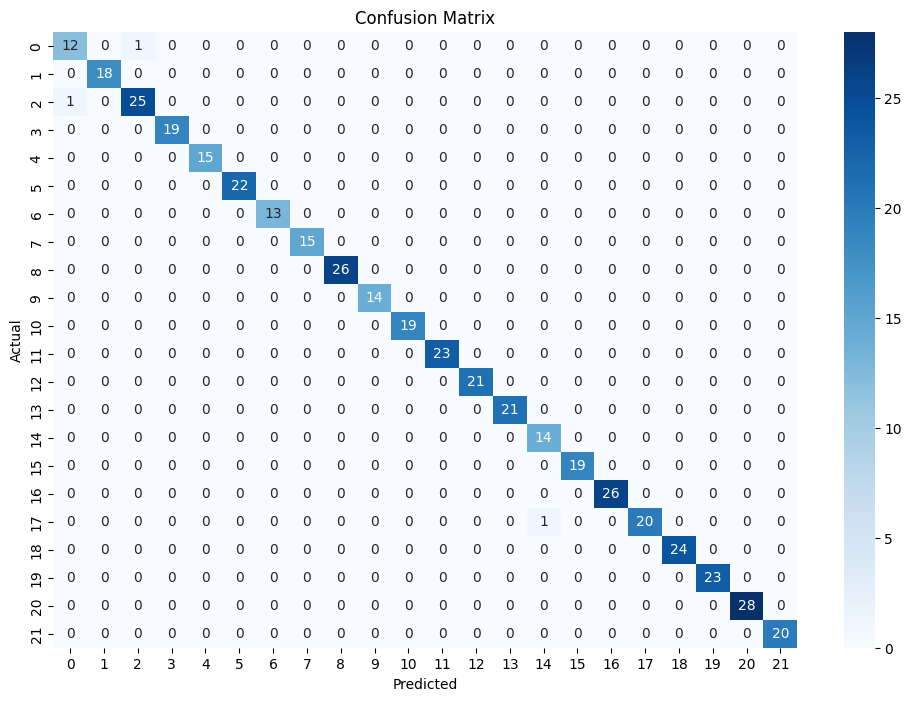

In [131]:
plt.figure(figsize=(12, 8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [132]:
sample = [[90, 40, 40, 25, 80, 6.5, 200]]
predicted_crop = model.predict(sample)
print("Recommended Crop:", predicted_crop[0])

Recommended Crop: 3


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


XGBoost

In [133]:
df.label.value_counts()

,count
label,
9,100
10,100
6,100
8,100
12,100
18,100
17,100
15,100
16,100


In [134]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
X_train=min_max.fit_transform(X_train)
X_test=min_max.transform(X_test)


In [135]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_train

array([[-0.58392488, -0.84673577, -0.66993722, ...,  0.8461098 ,
         1.68597716,  0.17107461],
       [-1.04536465, -0.99657339, -0.74788582, ...,  0.96701106,
         0.06997721,  0.10129257],
       [-0.63821192, -0.8767033 , -0.37762997, ...,  1.14366964,
        -0.42804099,  1.57565666],
       ...,
       [-1.26251278,  0.801478  , -0.63096292, ..., -0.17877436,
         1.24768405, -1.06572231],
       [ 1.47898232,  0.08225745, -0.65045007, ...,  0.45882043,
         1.02898256, -0.53755036],
       [-0.31248973, -1.11644348, -0.41660427, ..., -0.86724435,
        -1.98398683, -0.22284472]])

In [136]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score


In [137]:
models={
    'LogisticRegression': LogisticRegression(),
    'GaussianNB':GaussianNB(),
    'SVC':SVC(),
    'KNeighborsClassifier':KNeighborsClassifier(),
    'DecisionTreeClassifier':DecisionTreeClassifier(),
    'ExtraTreeClassifier':ExtraTreeClassifier(),
    'RandomForestClassifier':RandomForestClassifier(),
    'BaggingClassifier':BaggingClassifier(),
    'GradientBoostingClassifier':GradientBoostingClassifier(),
    'AdaBoostClassifier':AdaBoostClassifier()
}

In [138]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f"{name} model with accuracy: {score}")

LogisticRegression model with accuracy: 0.9659090909090909
GaussianNB model with accuracy: 0.990909090909091
SVC model with accuracy: 0.9863636363636363
KNeighborsClassifier model with accuracy: 0.9704545454545455
DecisionTreeClassifier model with accuracy: 0.9863636363636363
ExtraTreeClassifier model with accuracy: 0.9
RandomForestClassifier model with accuracy: 0.9977272727272727
BaggingClassifier model with accuracy: 0.9931818181818182
GradientBoostingClassifier model with accuracy: 0.9886363636363636
AdaBoostClassifier model with accuracy: 0.32272727272727275


In [139]:
randclf = RandomForestClassifier()
randclf.fit(X_train, y_train)
y_pred = randclf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9954545454545455

In [140]:
def recommendation(N, P, K, temperature, humidity, ph, rainfall):
    # Prepare the input as a 2D array
    features = np.array([[N, P, K, temperature, humidity, ph, rainfall]])

    # Use the pre-fitted scalers (don't call fit_transform here!)
    mx_features = min_max.transform(features)
    sc_mx_features = scaler.transform(mx_features)

    # Predict using the trained model
    prediction = randclf.predict(sc_mx_features)

    return prediction[0]


In [141]:
N = 20
P = 10
K = 5
temperature = 18.0
humidity = 30.0
ph = 6.5
rainfall = 30.0

predict = recommendation(N,P,K,temperature,humidity,ph,rainfall)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [142]:
predict

np.int64(18)

In [143]:
import pickle
pickle.dump(randclf, open('model.pkl', 'wb'))
pickle.dump(min_max, open('minmaxscaler.pkl', 'wb'))
pickle.dump(scaler, open('standscaler.pkl', 'wb'))

In [144]:
from zipfile import ZipFile

# Create a zip with selected files
with ZipFile("model_files.zip", "w") as zipf:
    zipf.write("model.pkl")
    zipf.write("minmaxscaler.pkl")
    zipf.write("standscaler.pkl")
    zipf.write("Crop_recommendation.csv")


# Download the zip
from google.colab import files
files.download("model_files.zip")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>